# 🎓 Advanced Python Data Analytics
**Objective:** Learn advanced techniques in data cleaning, feature engineering, modeling, and evaluation using Python libraries like Pandas, NumPy, Scikit-learn, and Seaborn.

## 📁 Step 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



SyntaxError: invalid syntax (2828842635.py, line 10)

## 📊 Step 2: Load and Preview the Dataset

In [3]:
df = pd.read_csv('telco_customer_churn_large.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,Yes,Yes,23,No,No,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,117.105825,NaN,Yes
1,CUST0001,Female,1,No,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,114.426649,5248.831005,Yes
2,CUST0002,Male,1,Yes,Yes,35,No,No,DSL,Yes,...,No,Yes,No internet service,Yes,One year,Yes,Credit card (automatic),67.421422,4415.841817,No
3,CUST0003,Male,1,Yes,No,37,Yes,No,No,No internet service,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),106.204265,714.154344,Yes
4,CUST0004,Male,1,No,No,24,No,Yes,DSL,Yes,...,No,No,Yes,No internet service,One year,Yes,Credit card (automatic),104.454940,3279.456640,Yes


## 🛠️ Step 3: Feature Engineering

In [4]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #forces to numeric format. 

# Create a new feature
df['MonthlyTenureRatio'] = df['MonthlyCharges'] / (df['tenure'] + 1) #based on years of tenure as a customer.

# Map binary to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'}) #changes to yes and no.

# Check for missing values
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges        10
TotalCharges          10
Churn                  0
MonthlyTenureRatio    10
dtype: int64

In [5]:
print("Convert TotalCharges to numeric")
print(df['TotalCharges'])

print("Create a new feature")
print(df['MonthlyTenureRatio'])

print("Map binary to categorical")
print(df['SeniorCitizen'])

Convert TotalCharges to numeric
0             NaN
1     5248.831005
2     4415.841817
3      714.154344
4     3279.456640
         ...     
95            NaN
96    2200.611025
97    7607.891227
98    1225.441976
99    3470.031712
Name: TotalCharges, Length: 100, dtype: float64
Create a new feature
0     4.879409
1     1.589259
2     1.872817
3     2.794849
4     4.178198
        ...   
95    0.705455
96    1.029734
97    1.728172
98    2.265983
99    4.248510
Name: MonthlyTenureRatio, Length: 100, dtype: float64
Map binary to categorical
0      No
1     Yes
2     Yes
3     Yes
4     Yes
     ... 
95    Yes
96    Yes
97    Yes
98     No
99     No
Name: SeniorCitizen, Length: 100, dtype: object


## 🧹 Step 4: Data Cleaning + Missing Value Imputation

In [6]:
# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Fill missing MonthlyCharges and TotalCharges with median
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop remaining missing values
df.dropna(inplace=True)

/var/folders/59/n5mnjhpj1lgg92rcpp6dw__00000gn/T/ipykernel_64196/2970019515.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
/var/folders/59/n5mnjhpj1lgg92rcpp6dw__00000gn/T/ipykernel_64196/2970019515.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [17]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyTenureRatio
0,CUST0000,Male,No,Yes,Yes,23,No,No,DSL,Yes,...,Yes,No,No,Month-to-month,No,Electronic check,117.105825,4706.567197,Yes,4.879409
1,CUST0001,Female,Yes,No,Yes,71,Yes,Yes,DSL,Yes,...,Yes,No,No,Month-to-month,No,Mailed check,114.426649,5248.831005,Yes,1.589259
2,CUST0002,Male,Yes,Yes,Yes,35,No,No,DSL,Yes,...,Yes,No internet service,Yes,One year,Yes,Credit card (automatic),67.421422,4415.841817,No,1.872817
3,CUST0003,Male,Yes,Yes,No,37,Yes,No,No,No internet service,...,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),106.204265,714.154344,Yes,2.794849
4,CUST0004,Male,Yes,No,No,24,No,Yes,DSL,Yes,...,No,Yes,No internet service,One year,Yes,Credit card (automatic),104.454940,3279.456640,Yes,4.178198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CUST0095,Female,Yes,No,No,65,Yes,Yes,DSL,No internet service,...,No,No,No internet service,One year,No,Bank transfer (automatic),46.560004,4706.567197,Yes,0.705455
96,CUST0096,Female,Yes,No,No,31,Yes,No,Fiber optic,Yes,...,Yes,No,No,One year,No,Electronic check,32.951492,2200.611025,Yes,1.029734
97,CUST0097,Female,Yes,Yes,No,62,Yes,Yes,DSL,Yes,...,No internet service,No internet service,No,Two year,No,Bank transfer (automatic),108.874808,7607.891227,No,1.728172
98,CUST0098,Female,No,Yes,No,50,No,No phone service,Fiber optic,Yes,...,Yes,No,Yes,One year,Yes,Credit card (automatic),115.565150,1225.441976,No,2.265983


## 🚨 Step 5: Outlier Detection and Transformation

## 🔍 Outlier Detection and Log Transformation Explained

This section covers two important preprocessing steps commonly used in data analytics and machine learning workflows:

---

### 📌 Z-score Method for Outlier Detection

**Purpose:**  
To identify and remove outliers from numerical columns using Z-scores.

**What’s a Z-score?**  
A Z-score indicates how many standard deviations a value is from the mean:
- A Z-score near 0 means the value is close to the mean.
- A Z-score greater than 3 (or less than -3) is typically considered an outlier.

**Why use it?**  
Removing outliers helps reduce skewness in the data and improves the performance of many models, especially those sensitive to extreme values like linear regression or distance-based algorithms (e.g., k-NN).

---

### 📌 Log Transformation

**Purpose:**  
To reduce right-skew in numeric data and make it resemble a more normal distribution.

**Why use `log1p()` instead of `log()`?**  
The `log1p()` function computes `log(1 + x)`, which:
- Handles values near zero more gracefully.
- Avoids errors from taking `log(0)` (which is undefined).

**Why apply log transformation?**  
- Makes highly skewed features more symmetric.
- Improves performance of models that assume normally distributed features.
- Helps linear models capture relationships more effectively.

Note: Log transformation is especially effective when all values are greater than 0, and that's the case with charges like MonthlyCharges and TotalCharges.

---

### ✅ Summary

| Step                | Purpose                                 |
|---------------------|------------------------------------------|
| Z-score filtering   | Removes outliers beyond 3 standard deviations |
| Log transformation  | Normalizes skewed distributions for better model fit |



C:\Users\David.Togami\AppData\Local\Temp\ipykernel_9228\1044528984.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MonthlyCharges_log'] = np.log1p(df['MonthlyCharges'])


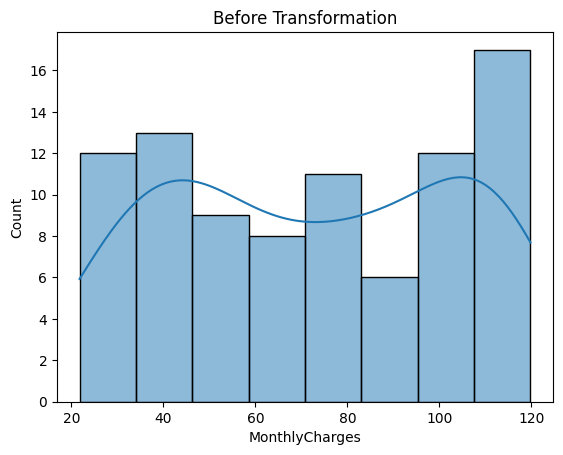

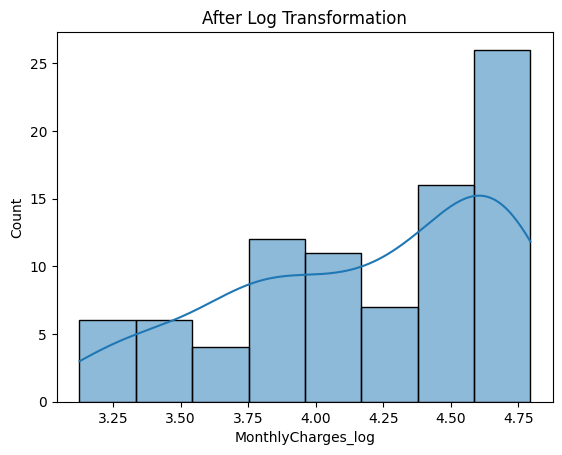

In [18]:
from scipy import stats

# Z-score method for outlier detection
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]

# Log transform MonthlyCharges
df['MonthlyCharges_log'] = np.log1p(df['MonthlyCharges'])

# Plot before and after transformation
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Before Transformation')
plt.show()

sns.histplot(df['MonthlyCharges_log'], kde=True)
plt.title('After Log Transformation')
plt.show()

## 🤔 Why Don't I See a Difference After Z-score and Log Transformation?

If your histograms look nearly identical before and after applying Z-score filtering and log transformation, here are a few reasons why that might be happening:

---

### 🧪 1. Small Dataset Size

- With only a few data points (e.g., fewer than 10), transformations may not show clearly.
- Visual differences become meaningful with larger datasets (100+ rows).

✅ **Fix:** Use a larger dataset to better observe changes in distribution.

---

### 📊 2. Data Was Already Fairly Symmetric

- If `MonthlyCharges` wasn’t heavily skewed to begin with, log transformation won’t alter its shape much.
- Log is most helpful for **right-skewed** data (long tail on the right).



### 🌸 3. Z-score Filtering Already Removed Outliers

- If Z-score filtering was applied **before** the log transformation, extreme values might already be gone.
- Since log transformation primarily helps compress large values, it will have **less impact** when the extremes are no longer present.

✅ **Suggestion:** Plot histograms at each step to see the transformation impact:
1. Before Z-score filtering  
2. After Z-score filtering  
3. After log transformation  

This step-by-step visualization helps confirm whether each transformation is working as intended.

### ✅ Summary

| ✅ **Cause**             | **Explanation**                                           | **What to Try**                            |
|--------------------------|-----------------------------------------------------------|---------------------------------------------|
| Small dataset            | Too few values to show transformation impact             | Use 100+ rows                                |
| Not enough skew          | Log doesn’t help if data is already symmetric            | Check `.skew()` before and after            |
| Z-score filtered first   | Outliers removed before log, reducing its visual effect  | Compare histograms step-by-step             |


## ✂️ Step 6: Prepare Data for Modeling

In [19]:
# Define target and features
y = df['Churn'].map({'No': 0, 'Yes': 1})
X = df.drop(['Churn', 'customerID'], axis=1) #churn in the target variable that we want to predict. 

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🔢 What is One-Hot Encoding?

One-Hot Encoding is a method for converting **categorical variables** into a **numeric format** that machine learning models can understand.

---

### 🧠 Why It's Needed

Most machine learning models can’t work with text labels like `"Male"`, `"Female"` or `"DSL"`, `"Fiber optic"` — they require **numerical input**.

Simply assigning numbers like `Male = 0`, `Female = 1` might suggest an **order or relationship** that doesn't actually exist.

That’s where **One-Hot Encoding** helps — by representing categories in a **non-ordinal, binary** format.


## 🧠 Step 7: Train a Machine Learning Model (Random Forest)

In [20]:
# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## 📈 Step 8: Model Evaluation

In [21]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print(f'\nAUC Score: {roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]):.2f}')

Confusion Matrix:
[[5 5]
 [7 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.17      0.12      0.14         8

    accuracy                           0.33        18
   macro avg       0.29      0.31      0.30        18
weighted avg       0.31      0.33      0.32        18


AUC Score: 0.20


## 📊 Step 9: Visualize Feature Importance + Correlations

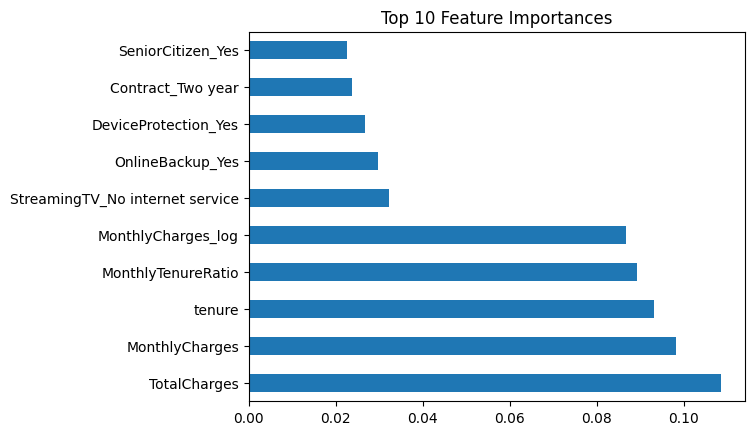

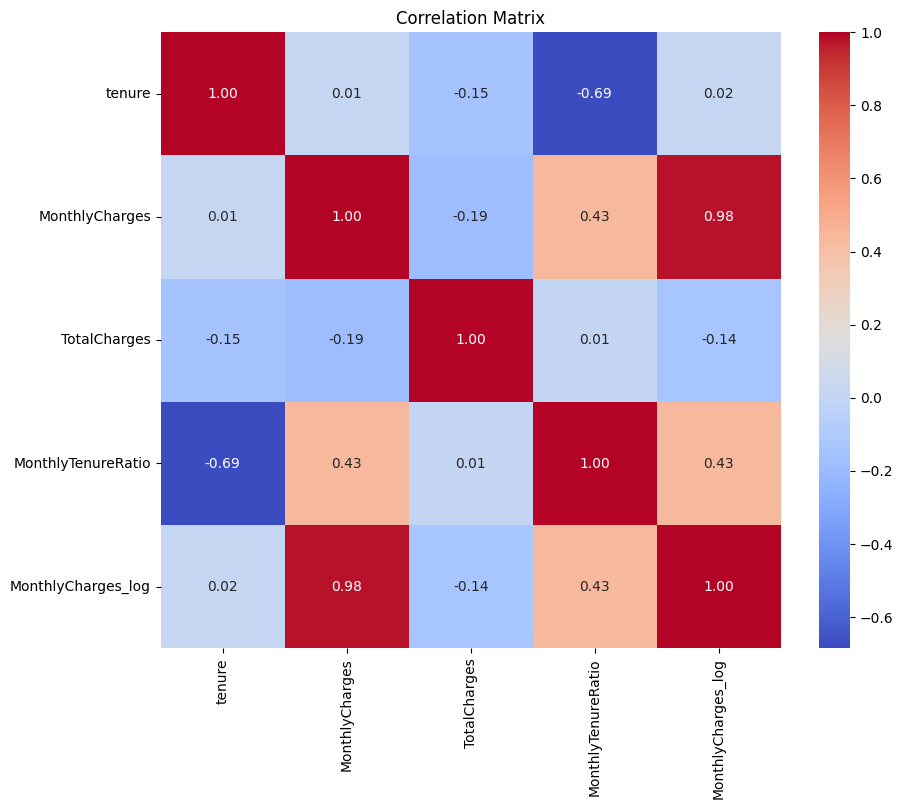

In [22]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## ✅ Step 10: Recap
- Feature engineering with ratios, mapping, and encoding
- Outlier detection using Z-score
- Log transformations for skewed data
- Random Forest modeling and evaluation
- Feature importance and correlation heatmap visualizations